# This work focuses on building a sentiment analysis model to classify user comments as positive, neutral, or negative. Using TensorFlow and Keras, the model is trained on labeled text data and utilizes an embedding layer followed by a neural network for classification. The goal is to create an interactive tool for real-time sentiment prediction, applicable in fields like customer feedback analysis and social media monitoring.

Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 367ms/step - accuracy: 0.4339 - loss: 0.9078 - val_accuracy: 0.7321 - val_loss: 0.8450
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 458ms/step - accuracy: 0.6215 - loss: 0.8033 - val_accuracy: 0.7943 - val_loss: 0.6179
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 356ms/step - accuracy: 0.8323 - loss: 0.5504 - val_accuracy: 0.8352 - val_loss: 0.4629
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 647ms/step - accuracy: 0.8637 - loss: 0.4118 - val_accuracy: 0.8489 - val_loss: 0.4102
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 16s 360ms/step - accuracy: 0.8877 - loss: 0.3532 - val_accuracy: 0.8394 - val_loss: 0.3819
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 356ms/step - accuracy: 0.8905 - loss: 0.3177 - val_accuracy: 0.8710 - val_loss: 0.3584
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 455ms/step - accuracy: 0.9130 - loss: 0.2810 - val_accuracy: 0.8747 - val_loss: 0.3446
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 357ms/step - accuracy: 0.9189 - loss: 0.2542 - val_accuracy:

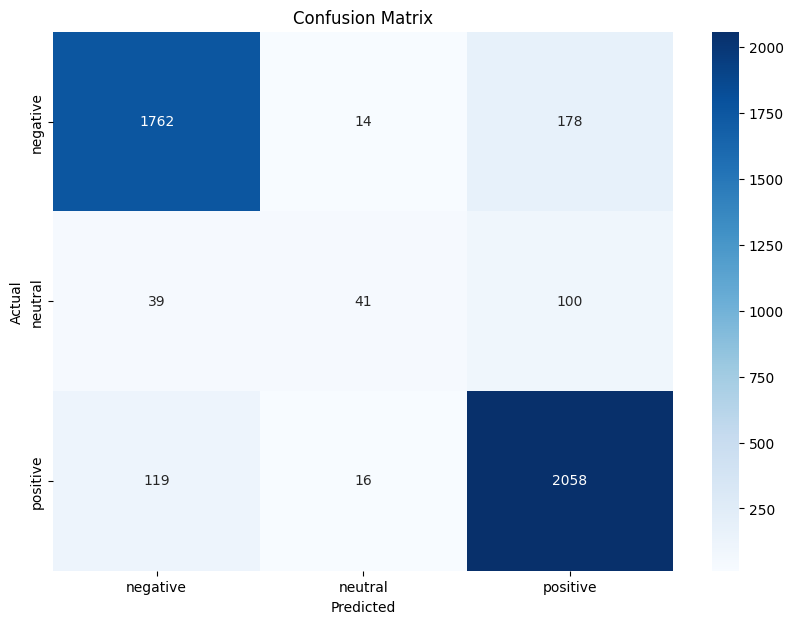

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


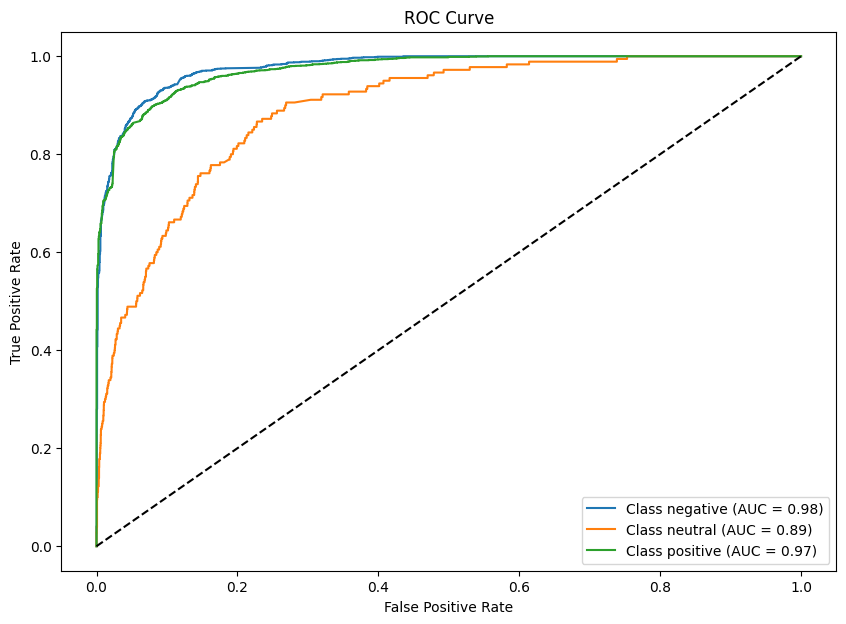

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load and preprocess data
data = pd.read_excel("new.xlsx")
data['Comment'] = data['Comment'].fillna("").astype(str)  # Fill NaN with empty strings and ensure all are strings
comments = data['Comment'].values
labels = data['Status'].values

# Encode labels
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Ensure labels are in the correct range (0, 1, 2)
labels = np.clip(labels, 0, 2)

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(comments, labels, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Tokenize and pad sequences
tokenizer = Tokenizer(num_words=50000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_val_sequences = tokenizer.texts_to_sequences(X_val)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

max_seq_length = 500
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_seq_length, padding='post', truncating='post')
X_val_padded = pad_sequences(X_val_sequences, maxlen=max_seq_length, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_seq_length, padding='post', truncating='post')

# Create the Neural Network model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=50000, output_dim=16),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train_padded, y_train, epochs=20, batch_size=2000, validation_data=(X_val_padded, y_val))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_padded, y_test)
print(f"Test accuracy: {test_accuracy}")




# Generate classification report
y_pred = np.argmax(model.predict(X_test_padded), axis=1)
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['negative', 'neutral', 'positive']))

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'neutral', 'positive'], yticklabels=['negative', 'neutral', 'positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot ROC curve for each class
y_pred_proba = model.predict(X_test_padded)
plt.figure(figsize=(10, 7))
for i, class_label in enumerate(['negative', 'neutral', 'positive']):
    fpr, tpr, _ = roc_curve(y_test == i, y_pred_proba[:, i])
    plt.plot(fpr, tpr, label=f'Class {class_label} (AUC = {roc_auc_score(y_test == i, y_pred_proba[:, i]):.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


# **The console app provides an interactive interface where users can input text, and the model predicts its sentiment as positive, neutral, or negative. The app continuously accepts user input and classifies the sentiment until the user types "exit" to stop the application. This provides a simple, real-time sentiment analysis tool directly in the console.**

In [ ]:
# Allow the user to input text and classify it as positive, negative, or neutral
def predict_sentiment(text):
    # Tokenize and pad the input text
    text_sequence = tokenizer.texts_to_sequences([text])
    text_padded = pad_sequences(text_sequence, maxlen=max_seq_length, padding='post', truncating='post')

    # Predict sentiment
    prediction = np.argmax(model.predict(text_padded), axis=1)

    # Map predictions to sentiment labels
    sentiment = ['negative', 'neutral', 'positive']
    return sentiment[prediction[0]]

# Create the console application
def start_sentiment_analysis():
    print("Sentiment Analysis Console App")
    print("Type 'exit' to quit.")

    while True:
        # Input text from the user
        user_input = input("Enter a sentence for sentiment analysis: ")

        # Exit condition
        if user_input.lower() == 'exit':
            print("Exiting the sentiment analysis app.")
            break

        # Predict sentiment
        sentiment = predict_sentiment(user_input)
        print(f"The sentiment of the entered text is: {sentiment}\n")

# Run the console app
start_sentiment_analysis()


Sentiment Analysis Console App
Type 'exit' to quit.
Enter a sentence for sentiment analysis: ধন্যবাদ ভাইভিডিওর মাধ্যমে পৃথিবীর বিভিন্ন দেশ আমাদের দেখানোর জন্যভালোবাসা নিবেন ভাই
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
The sentiment of the entered text is: positive

Enter a sentence for sentiment analysis: অসাধারণ সুন্দর ভিডিও
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
The sentiment of the entered text is: positive

Enter a sentence for sentiment analysis: আমি বেশী কিছু বলবো না সুদু বলতে চাই আলম তর জামা কাপর গুলো কোথা থেকে পাছ
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
The sentiment of the entered text is: negative

Enter a sentence for sentiment analysis: অসাধারণ
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
The sentiment of the entered text is: positive

Enter a sentence for sentiment analysis: পাগলের পাগলামি দেখে মজা লই হা হা হা হা হা হা
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
The sentiment of the entered text is: negative

